In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
pamella = pd.read_csv('pamella453.csv')

In [3]:
pamella.drop(['Unnamed: 0'],axis=1,inplace=True)

In [4]:
pamella

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,1
4,IW72280,California,5035.035257,No,Basic,Doctor,2011-02-14,Employed,F,37405,...,3.0,4,Corporate Auto,Corporate L2,Offer2,Branch,287.556107,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,SU71163,Arizona,2771.663013,No,Basic,College,2011-01-07,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,1
9130,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2011-02-24,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,2
9131,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,1
9132,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,2


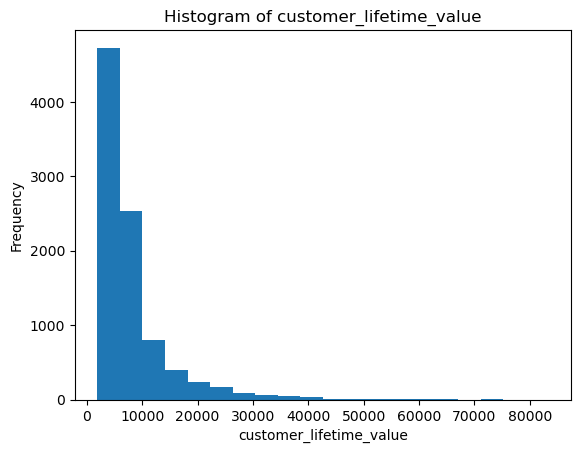

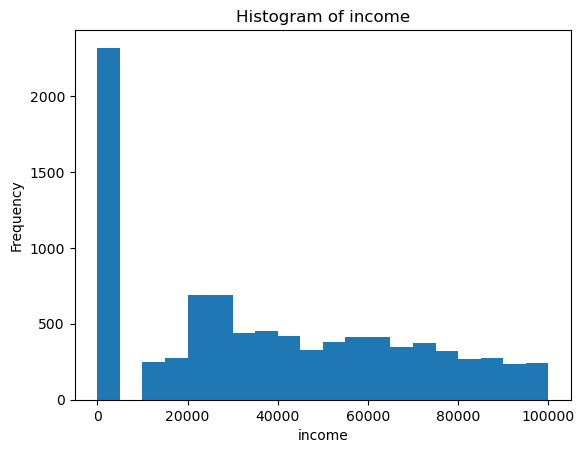

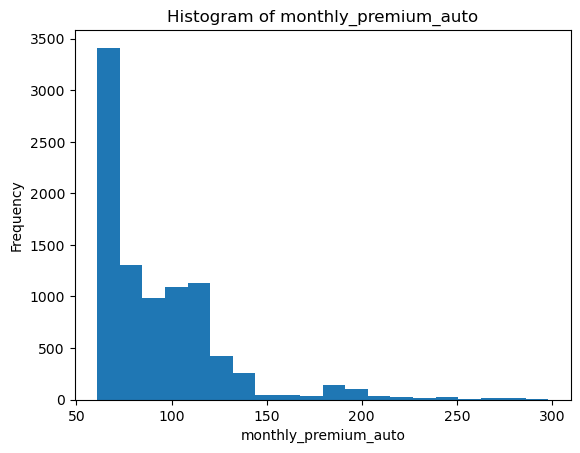

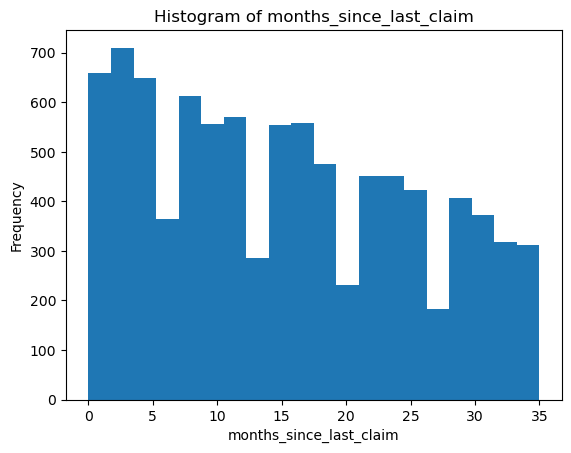

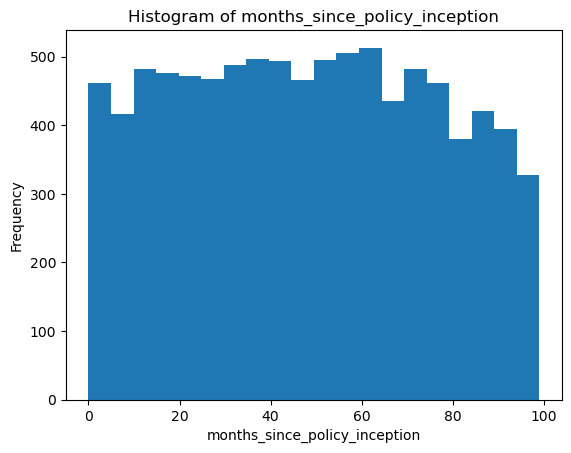

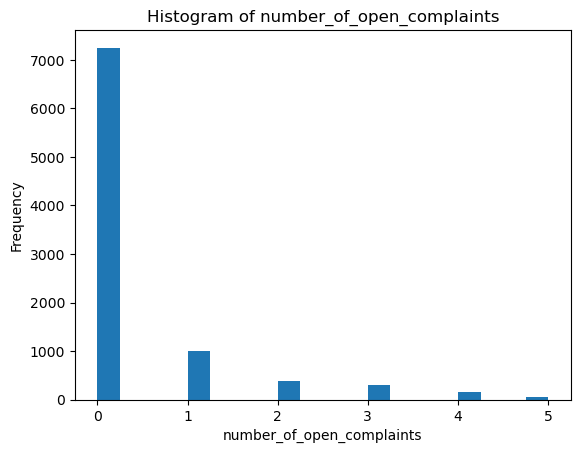

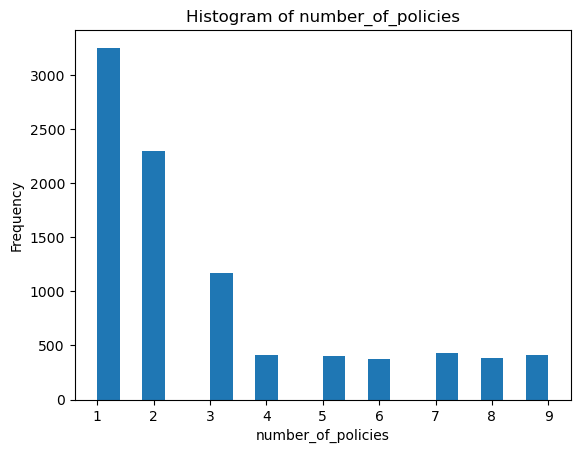

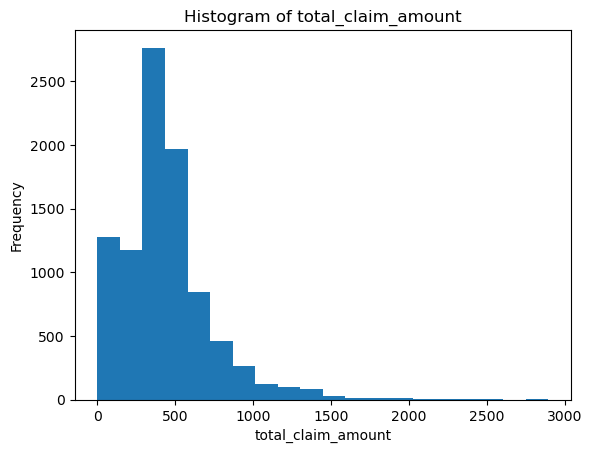

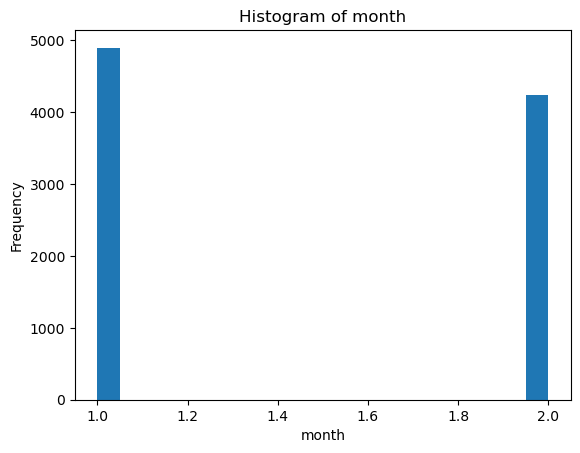

In [5]:
numerical = pamella.select_dtypes(include=np.number)

for col in numerical:
    plt.hist(numerical[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,4809.216960,48029,61,7.0,52,0.0,9,292.800000,2
1,2228.525238,0,64,3.0,26,0.0,1,744.924331,1
2,14947.917300,22139,100,34.0,31,0.0,2,480.000000,2
3,22332.439460,49078,97,10.0,3,0.0,2,484.013411,1
4,5035.035257,37405,63,8.0,99,3.0,4,287.556107,2
...,...,...,...,...,...,...,...,...,...
9129,2771.663013,59855,74,30.0,82,4.0,1,355.200000,1
9130,19228.463620,0,187,14.0,32,0.0,2,897.600000,2
9131,5259.444853,61146,65,7.0,68,0.0,6,273.018929,1
9132,23893.304100,39837,201,11.0,63,0.0,2,381.306996,2


In [8]:
X = numerical.drop(['total_claim_amount'],axis=1)
Y = numerical['total_claim_amount']

<function matplotlib.pyplot.show(close=None, block=None)>

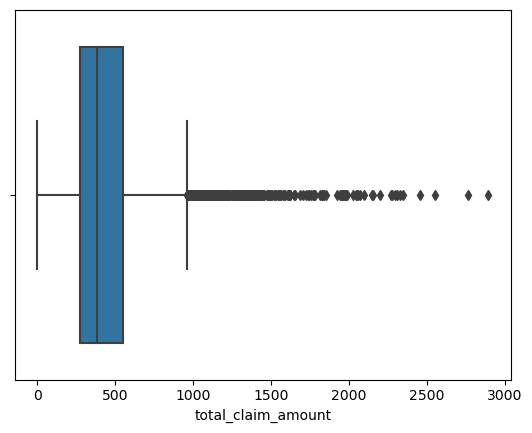

In [9]:
sns.boxplot(x=numerical['total_claim_amount'])
plt.show

In [10]:
numerical['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [11]:
numerical_columns = pamella.select_dtypes(include=[float, int]).columns.tolist()
print(numerical_columns)

['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'month']


<function matplotlib.pyplot.show(close=None, block=None)>

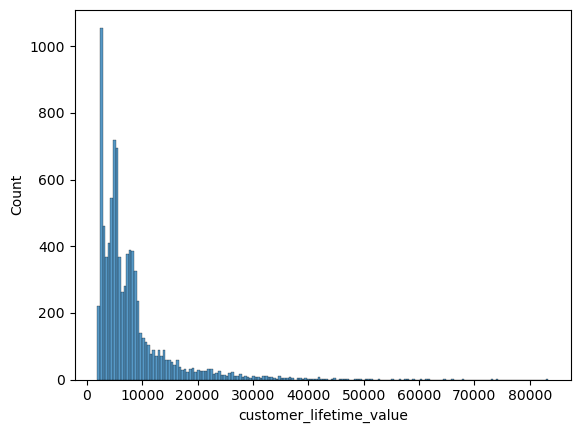

In [12]:
sns.histplot(pamella['customer_lifetime_value'])
plt.show

In [13]:
pamella['customer_lifetime_value_log'] = np.log(pamella['customer_lifetime_value'])

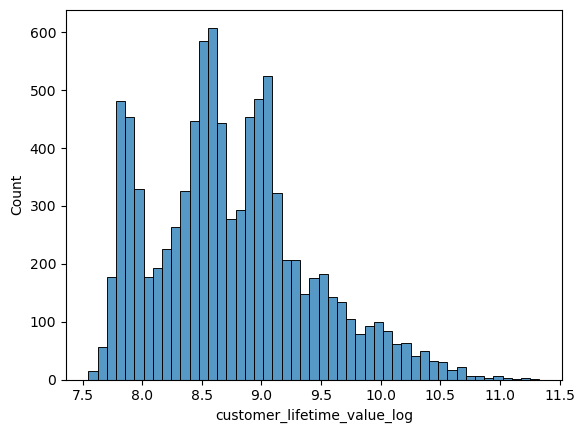

In [14]:
sns.histplot(pamella['customer_lifetime_value_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

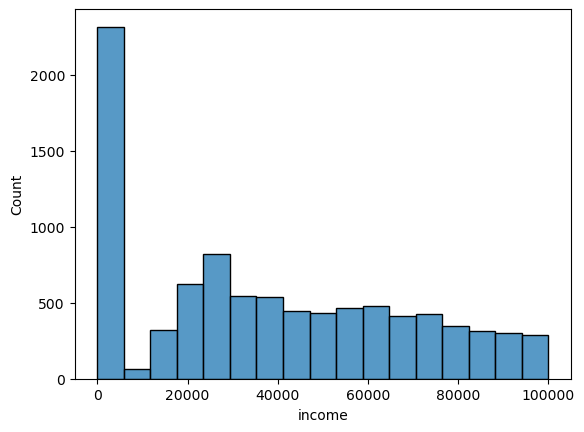

In [15]:
sns.histplot(pamella['income'])
plt.show

C:\Users\simoe\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


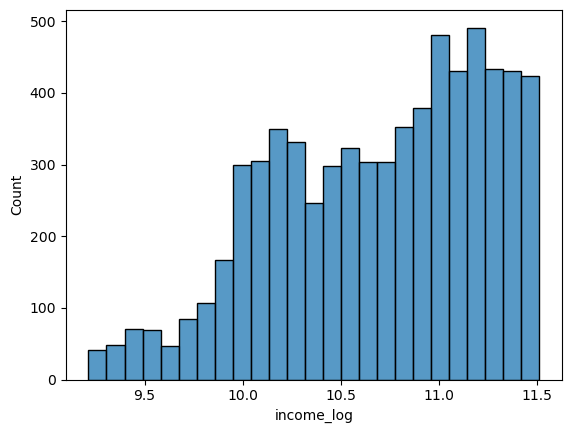

In [16]:
pamella['income_log'] = np.log(pamella['income'])
sns.histplot(pamella['income_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

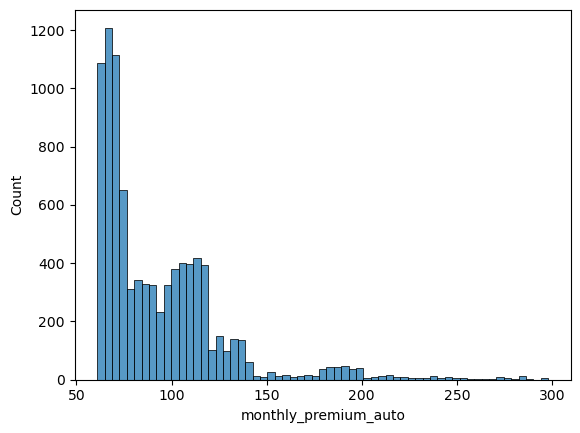

In [17]:
sns.histplot(pamella['monthly_premium_auto'])
plt.show

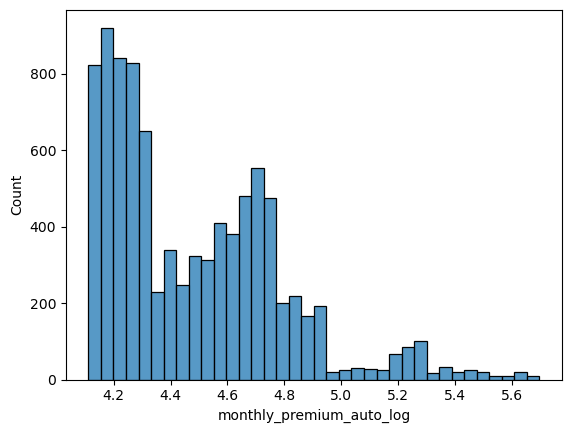

In [18]:
pamella['monthly_premium_auto_log'] = np.log(pamella['monthly_premium_auto'])
sns.histplot(pamella['monthly_premium_auto_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

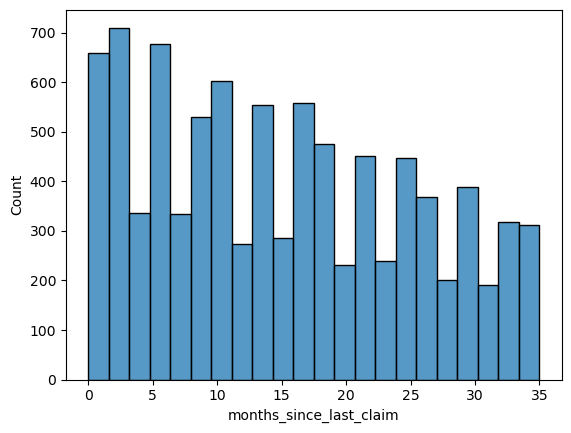

In [19]:
sns.histplot(pamella['months_since_last_claim'])
plt.show

C:\Users\simoe\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


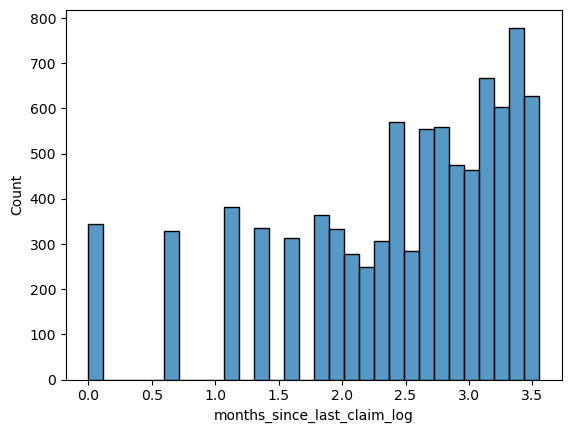

In [20]:
pamella['months_since_last_claim_log'] = np.log(pamella['months_since_last_claim'])
sns.histplot(pamella['months_since_last_claim_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

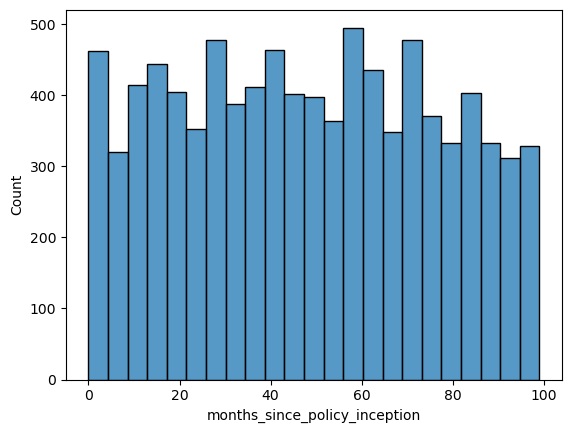

In [21]:
sns.histplot(pamella['months_since_policy_inception'])
plt.show

C:\Users\simoe\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


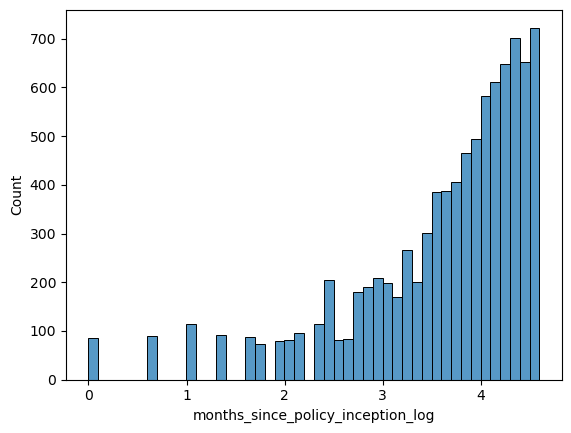

In [22]:
pamella['months_since_policy_inception_log'] = np.log(pamella['months_since_policy_inception'])
sns.histplot(pamella['months_since_policy_inception_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

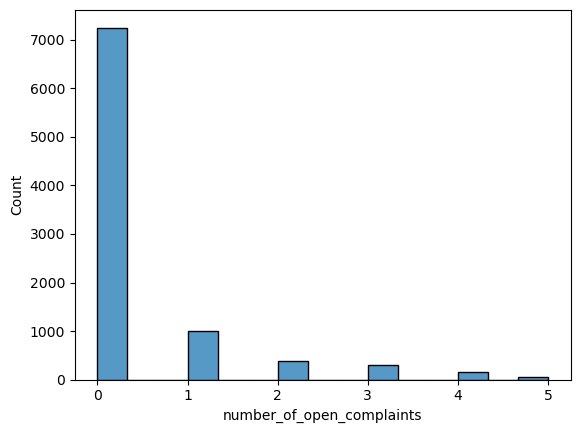

In [23]:
sns.histplot(pamella['number_of_open_complaints'])
plt.show

C:\Users\simoe\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


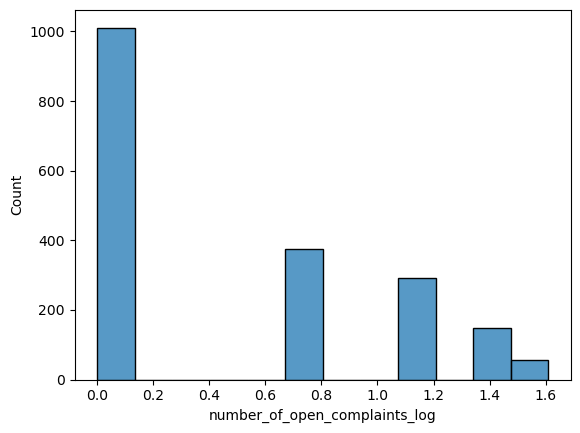

In [24]:
pamella['number_of_open_complaints_log'] = np.log(pamella['number_of_open_complaints'])
sns.histplot(pamella['number_of_open_complaints_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

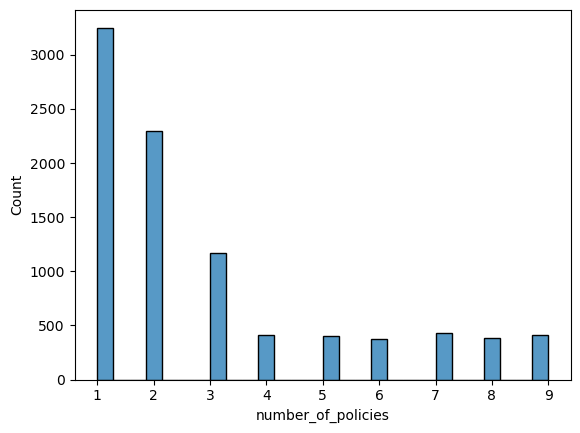

In [25]:
sns.histplot(pamella['number_of_policies'])
plt.show

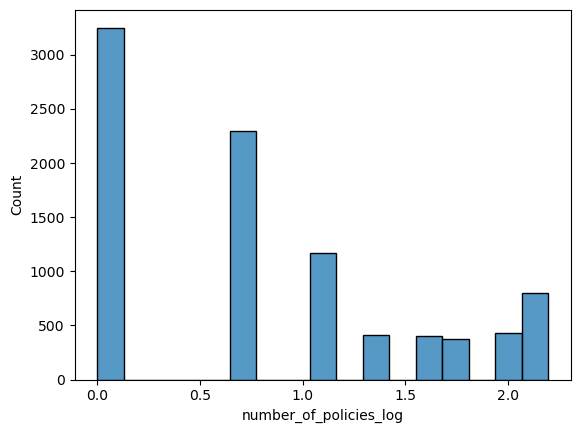

In [26]:
pamella['number_of_policies_log'] = np.log(pamella['number_of_policies'])
sns.histplot(pamella['number_of_policies_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

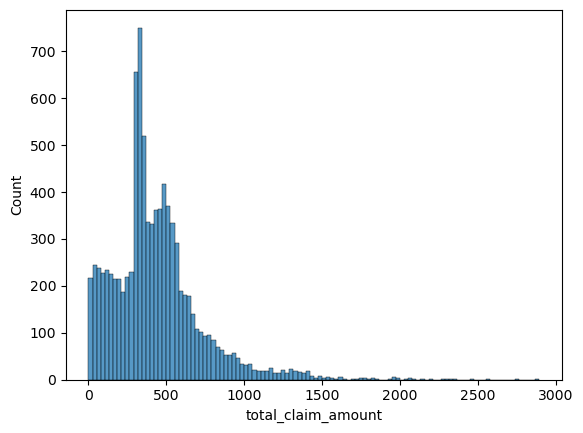

In [27]:
sns.histplot(pamella['total_claim_amount'])
plt.show

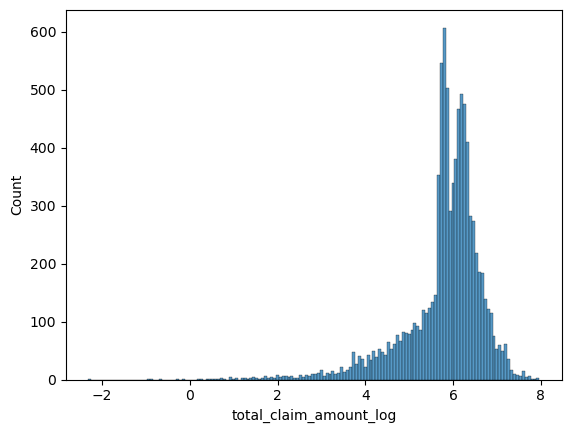

In [28]:
pamella['total_claim_amount_log'] = np.log(pamella['total_claim_amount'])
sns.histplot(pamella['total_claim_amount_log'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

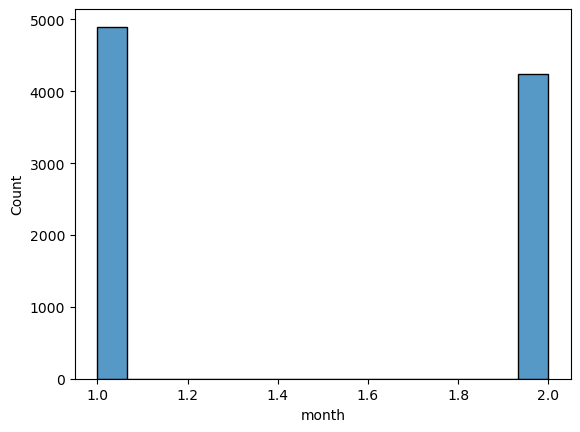

In [29]:
sns.histplot(pamella['month'])
plt.show

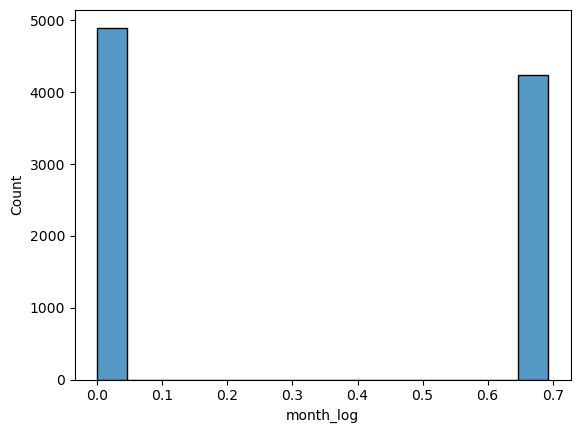

In [30]:
pamella['month_log'] = np.log(pamella['month'])
sns.histplot(pamella['month_log'])
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4,random_state=100)

In [34]:
len(X)

9134

In [35]:
len(X_train)

5480

In [36]:
X_train

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
3715,9357.737821,33060,117,19.0,91,0.0,3,1
3824,5443.761524,41449,69,16.0,96,1.0,3,2
4708,2867.312197,23376,78,19.0,18,0.0,1,1
8734,29037.477530,0,113,0.0,16,0.0,2,2
6094,3508.569533,20978,98,19.0,96,1.0,1,1
...,...,...,...,...,...,...,...,...
350,4477.452010,41402,119,26.0,26,4.0,1,1
79,9549.113813,55986,119,3.0,60,0.0,9,2
8039,2712.915597,58508,69,32.0,11,0.0,1,2
6936,6282.317743,0,172,23.0,6,0.0,1,1


In [37]:
model = sm.OLS(y_train,X_train).fit()

In [38]:
predictions = model.predict(X_test)

In [40]:
r2_score(y_test,predictions)

0.5049135107841203